In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso, RidgeCV, SGDRegressor

In [2]:
from tpot.builtins import StackingEstimator
from tpot.export_utils import set_param_recursive
from sklearn.pipeline import make_pipeline, make_union

In [3]:
df= pd.read_excel(r"C:\Users\yedla\Downloads\Stacking_max_stress\vznd6z234n-1\Data.xlsx")
df.head()

,L1,L2,L3,L4,L5,L6,force,depth,hole_radius,circle_radius,hole_angle,width,length,max_stress
0,0,90,45,-45,90,0,40000,3.636,3.0,4.5,15,36,250,1726.66
1,0,90,45,-45,90,0,40000,3.636,3.0,4.5,15,36,200,1727.58
2,0,90,45,-45,90,0,40000,3.636,3.0,4.5,15,36,150,1731.44
3,0,90,45,-45,90,0,40000,3.636,3.0,4.5,15,36,100,1734.23
4,0,90,45,-45,90,0,40000,3.636,3.0,4.5,15,32,250,1975.26


In [4]:
y=df.iloc[:,-1:]
y.head()

,max_stress
0,1726.66
1,1727.58
2,1731.44
3,1734.23
4,1975.26


In [5]:
X=df.iloc[:,:-1]
X.head()

,L1,L2,L3,L4,L5,L6,force,depth,hole_radius,circle_radius,hole_angle,width,length
0,0,90,45,-45,90,0,40000,3.636,3.0,4.5,15,36,250
1,0,90,45,-45,90,0,40000,3.636,3.0,4.5,15,36,200
2,0,90,45,-45,90,0,40000,3.636,3.0,4.5,15,36,150
3,0,90,45,-45,90,0,40000,3.636,3.0,4.5,15,36,100
4,0,90,45,-45,90,0,40000,3.636,3.0,4.5,15,32,250


In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=19)

In [7]:
print(len(X_train),len(X_test))

6136 2630


In [8]:
# Average CV score on the training set was: 0.9765319533264453
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=GradientBoostingRegressor(alpha=0.8, learning_rate=0.1, loss="quantile", max_depth=6, max_features=0.15000000000000002, min_samples_leaf=13, min_samples_split=5, n_estimators=100, subsample=0.7000000000000001)),
    PolynomialFeatures(degree=2, include_bias=False, interaction_only=False),
    #StackingEstimator(estimator=SGDRegressor(alpha=0.0, eta0=1.0, fit_intercept=True, l1_ratio=0.25, learning_rate="invscaling", loss="epsilon_insensitive", penalty="elasticnet", power_t=1.0)),
    StackingEstimator(estimator=DecisionTreeRegressor(max_depth=7, min_samples_leaf=4, min_samples_split=14)),
    #StackingEstimator(estimator=KNeighborsRegressor(n_neighbors=32, p=1, weights="uniform")),
    Lasso()
)

In [9]:
# Fix random state for all the steps in exported pipeline
set_param_recursive(exported_pipeline.steps, 'random_state', 19)

In [10]:
exported_pipeline.fit(X_train, y_train)

C:\Users\yedla\anaconda\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\yedla\anaconda\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\yedla\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.865e+07, tolerance: 1.251e+06
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('stackingestimator-1',
                 StackingEstimator(estimator=GradientBoostingRegressor(alpha=0.8,
                                                                       loss='quantile',
                                                                       max_depth=6,
                                                                       max_features=0.15000000000000002,
                                                                       min_samples_leaf=13,
                                                                       min_samples_split=5,
                                                                       random_state=19,
                                                                       subsample=0.7000000000000001))),
                ('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                ('stackingestimator-2',
                 StackingEstimator(estimator=DecisionTreeRegressor(max_depth=7,
                                                                   min_samples_leaf=4,
                                                                   min_samples_split=14,
                                                                   random_state=19))),
                ('lasso', Lasso(random_state=19))])

In [11]:
results = exported_pipeline.predict(X_test)

C:\Users\yedla\anaconda\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


In [12]:
results

array([1347.70117985, 1719.51510644, 1645.86450814, ..., 4995.90159383,
        907.42325535, 3033.82063161])

In [13]:
#r2_score for testing 
r2_test=exported_pipeline.score(X_test,y_test)

C:\Users\yedla\anaconda\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


In [14]:
r2_test

0.9933564103618165

In [15]:
#r2_score for training
r2_train=exported_pipeline.score(X_train,y_train)

C:\Users\yedla\anaconda\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


In [16]:
r2_train

0.9954765872032821

In [17]:
y_test

,max_stress
2950,1337.810
1563,1857.170
3671,1636.810
563,4079.530
6047,2798.770
...,...
175,2676.550
5614,834.020
2425,5070.920
8482,972.887


In [18]:
max_stress=y_test['max_stress']

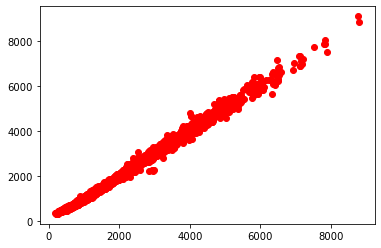

In [19]:
plt.scatter(results,max_stress, color = 'red')
#plot.plot(X_train, linearRegressor.predict(xTrain), color = 'blue')
plt.show()